この授業では気象データ(epwファイル)をpythonのライブラリで読み込んで、可視化、分析します

In [1]:
! pip install pandas matplotlib

In [6]:
import pandas as pd
from datetime import datetime

### 気象データ（epwデータ）を取り込みます

In [7]:
col = ['Year','Month','Day','Hour','Minute','Datasource','DryBulb {C}','DewPoint {C}','RelHum {%}','Atmos Pressure {Pa}','ExtHorzRad {Wh/m2}','ExtDirRad {Wh/m2}',
       'HorzIRSky {Wh/m2}','GloHorzRad {Wh/m2}','DirNormRad {Wh/m2}','DifHorzRad {Wh/m2}','GloHorzIllum {lux}','DirNormIllum {lux}',
       'DifHorzIllum {lux}','ZenLum {Cd/m2}','WindDir {deg}','WindSpd {m/s}','TotSkyCvr {.1}','OpaqSkyCvr {.1}','Visibility {km}',
       'Ceiling Hgt {m}','PresWeathObs','PresWeathCodes','Precip Wtr {mm}','Aerosol Opt Depth {.001}','SnowDepth {cm}','Days Last Snow','Albedo {.01}','Rain {mm}','Rain Quantity {hr}']

In [4]:
df=pd.read_csv('data/JPN_Tokyo.epw.csv', names=col, header=None)

In [10]:
df

,Year,Month,Day,Hour,Minute,Datasource,DryBulb {C},DewPoint {C},RelHum {%},Atmos Pressure {Pa},...,Ceiling Hgt {m},PresWeathObs,PresWeathCodes,Precip Wtr {mm},Aerosol Opt Depth {.001},SnowDepth {cm},Days Last Snow,Albedo {.01},Rain {mm},Rain Quantity {hr}
0,1983,1,1,1,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0,-1.1,-5.5,69,100905,...,1500,9,999999999,0,0.174,0,88,0,0,0
1,1983,1,1,2,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0,-1.9,-5.9,71,100905,...,1500,9,999999999,0,0.174,0,88,0,0,0
2,1983,1,1,3,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0,-2.6,-6.2,74,100905,...,1800,9,999999999,0,0.174,0,88,0,0,0
3,1983,1,1,4,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0,-3.2,-6.3,76,100905,...,22000,9,999999999,0,0.174,0,88,0,0,0
4,1983,1,1,5,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7B8*0A7*0*0E8*0*0,-3.7,-6.5,79,100905,...,22000,9,999999999,0,0.174,0,88,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1994,12,31,20,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0,3.8,-0.4,74,100905,...,1200,9,999999999,0,0.095,0,88,0,0,0
8756,1994,12,31,21,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0,2.8,-1.5,72,100905,...,1200,9,999999999,0,0.095,0,88,0,0,0
8757,1994,12,31,22,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0,1.8,-2.6,70,100905,...,22000,9,999999999,0,0.095,0,88,0,0,0
8758,1994,12,31,23,60,C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0,0.8,-3.8,69,100905,...,22000,9,999999999,0,0.095,0,88,0,0,0


### indexをdatetimeに変換する

In [12]:
def parseDate(df,singleYear=True):
    def convertToDatetime(year,month,day,hour):
        strDateTime = f'{month}/{day}/{year} {hour-1}:00'
        return datetime.strptime(strDateTime, '%m/%d/%Y %H:%M')
    
    def convertToDatetimeNoYear(month,day,hour):
        strDateTime = f'{month}/{day}/2021 {hour-1}:00'
        return datetime.strptime(strDateTime, '%m/%d/%Y %H:%M')
    
    if singleYear:
        df.index = df.apply(lambda x: convertToDatetime(x['Year'], x['Month'], x['Day'], x['Hour']), axis=1) 
        
    else:
        df.index = df.apply(lambda x: convertToDatetimeNoYear(x['Month'], x['Day'], x['Hour']), axis=1) 
    
    df=df.drop(['Year','Day','Hour','Minute','Datasource'], axis = 1)
    return df

In [13]:
parse_df = parseDate(df,False)

In [7]:
parse_df.iloc[:,:16]

,Month,DryBulb {C},DewPoint {C},RelHum {%},Atmos Pressure {Pa},ExtHorzRad {Wh/m2},ExtDirRad {Wh/m2},HorzIRSky {Wh/m2},GloHorzRad {Wh/m2},DirNormRad {Wh/m2},DifHorzRad {Wh/m2},GloHorzIllum {lux},DirNormIllum {lux},DifHorzIllum {lux},ZenLum {Cd/m2},WindDir {deg}
2021-01-01 00:00:00,1,-1.1,-5.5,69,100905,0,1415,254,0,0,0,0,0,0,0,0
2021-01-01 01:00:00,1,-1.9,-5.9,71,100905,0,1415,251,0,0,0,0,0,0,0,0
2021-01-01 02:00:00,1,-2.6,-6.2,74,100905,0,1415,248,0,0,0,0,0,0,0,270
2021-01-01 03:00:00,1,-3.2,-6.3,76,100905,0,1415,245,0,0,0,0,0,0,0,0
2021-01-01 04:00:00,1,-3.7,-6.5,79,100905,0,1415,243,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,12,3.8,-0.4,74,100905,0,1415,278,0,0,0,0,0,0,0,10
2021-12-31 20:00:00,12,2.8,-1.5,72,100905,0,1415,273,0,0,0,0,0,0,0,20
2021-12-31 21:00:00,12,1.8,-2.6,70,100905,0,1415,268,0,0,0,0,0,0,0,300
2021-12-31 22:00:00,12,0.8,-3.8,69,100905,0,1415,263,0,0,0,0,0,0,0,280


### 風速分布を可視化する

<AxesSubplot:>

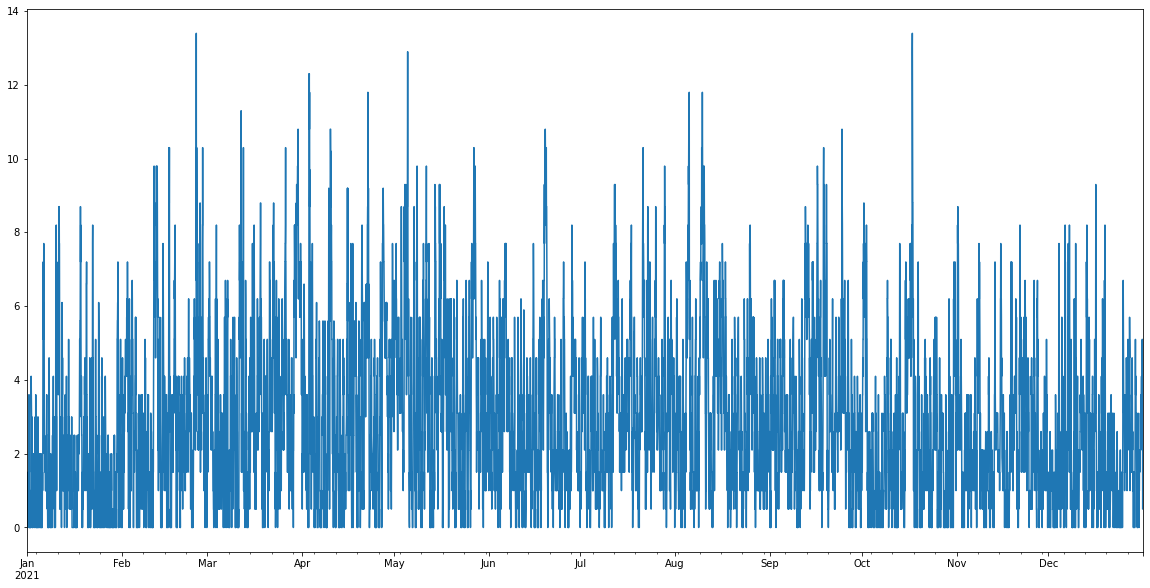

In [14]:
parse_df['WindSpd {m/s}'].plot(figsize=(20,10))

### 頻度分布を可視化する

<AxesSubplot:>

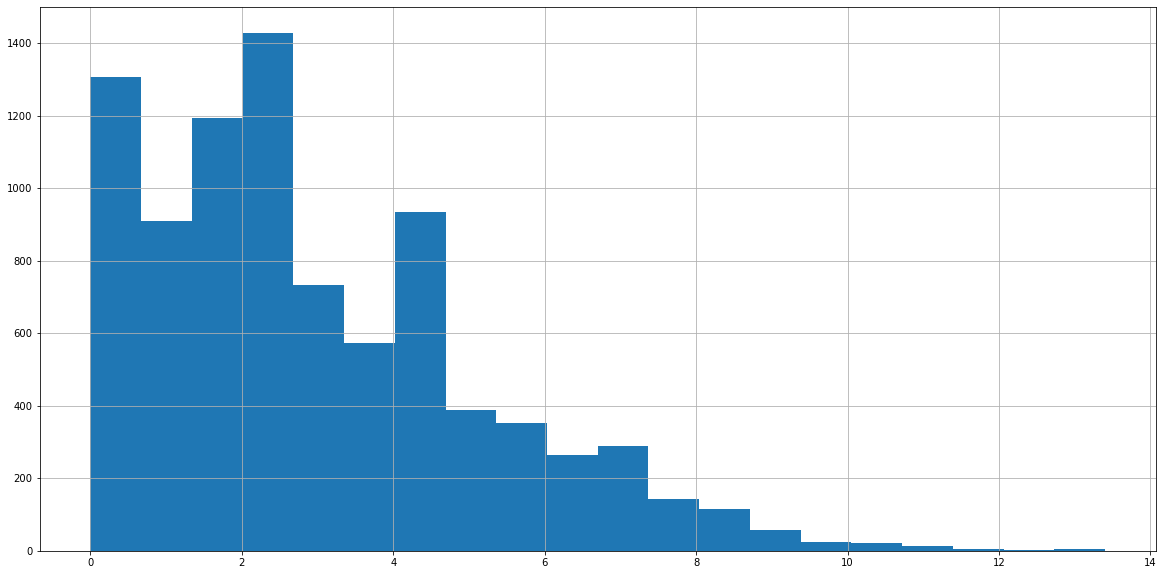

In [15]:
parse_df['WindSpd {m/s}'].hist(figsize=(20,10),bins=20)

In [16]:
parse_df

,Month,DryBulb {C},DewPoint {C},RelHum {%},Atmos Pressure {Pa},ExtHorzRad {Wh/m2},ExtDirRad {Wh/m2},HorzIRSky {Wh/m2},GloHorzRad {Wh/m2},DirNormRad {Wh/m2},...,Ceiling Hgt {m},PresWeathObs,PresWeathCodes,Precip Wtr {mm},Aerosol Opt Depth {.001},SnowDepth {cm},Days Last Snow,Albedo {.01},Rain {mm},Rain Quantity {hr}
2021-01-01 00:00:00,1,-1.1,-5.5,69,100905,0,1415,254,0,0,...,1500,9,999999999,0,0.174,0,88,0,0,0
2021-01-01 01:00:00,1,-1.9,-5.9,71,100905,0,1415,251,0,0,...,1500,9,999999999,0,0.174,0,88,0,0,0
2021-01-01 02:00:00,1,-2.6,-6.2,74,100905,0,1415,248,0,0,...,1800,9,999999999,0,0.174,0,88,0,0,0
2021-01-01 03:00:00,1,-3.2,-6.3,76,100905,0,1415,245,0,0,...,22000,9,999999999,0,0.174,0,88,0,0,0
2021-01-01 04:00:00,1,-3.7,-6.5,79,100905,0,1415,243,0,0,...,22000,9,999999999,0,0.174,0,88,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,12,3.8,-0.4,74,100905,0,1415,278,0,0,...,1200,9,999999999,0,0.095,0,88,0,0,0
2021-12-31 20:00:00,12,2.8,-1.5,72,100905,0,1415,273,0,0,...,1200,9,999999999,0,0.095,0,88,0,0,0
2021-12-31 21:00:00,12,1.8,-2.6,70,100905,0,1415,268,0,0,...,22000,9,999999999,0,0.095,0,88,0,0,0
2021-12-31 22:00:00,12,0.8,-3.8,69,100905,0,1415,263,0,0,...,22000,9,999999999,0,0.095,0,88,0,0,0


### データを条件によってフィルタリングする

In [18]:
def filterDf(df,key,min,max):
    df=df[df[key] > min]
    df=df[df[key] < max]
    return df

### 温度が15℃以上28℃以下でフィルタリング

In [19]:
filter_df=filterDf(parse_df,'DryBulb {C}',15,28)

In [20]:
filter_df

,Month,DryBulb {C},DewPoint {C},RelHum {%},Atmos Pressure {Pa},ExtHorzRad {Wh/m2},ExtDirRad {Wh/m2},HorzIRSky {Wh/m2},GloHorzRad {Wh/m2},DirNormRad {Wh/m2},...,Ceiling Hgt {m},PresWeathObs,PresWeathCodes,Precip Wtr {mm},Aerosol Opt Depth {.001},SnowDepth {cm},Days Last Snow,Albedo {.01},Rain {mm},Rain Quantity {hr}
2021-02-10 12:00:00,2,16.0,-1.0,31,100905,870,1405,329,639,905,...,22000,0,999999919,0,0.090,0,88,0,0,0
2021-02-10 13:00:00,2,17.0,0.0,32,100905,787,1405,335,427,265,...,6600,0,999999919,0,0.090,0,88,0,0,0
2021-02-10 14:00:00,2,17.0,-1.0,29,100905,636,1405,334,376,408,...,6600,0,999999919,0,0.090,0,88,0,0,0
2021-02-10 15:00:00,2,16.0,0.0,34,100905,428,1405,330,245,518,...,22000,0,999999919,0,0.090,0,88,0,0,0
2021-02-11 11:00:00,2,16.2,7.0,54,100905,885,1404,340,645,875,...,22000,9,999999999,0,0.090,0,88,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25 13:00:00,11,16.0,9.0,63,100905,614,1404,341,390,652,...,22000,9,999999999,0,0.119,0,88,0,0,0
2021-11-29 11:00:00,11,15.5,4.0,46,100905,751,1406,333,517,776,...,22000,9,999999999,0,0.114,0,88,0,0,0
2021-11-29 12:00:00,11,16.0,4.0,45,100905,712,1406,335,482,754,...,22000,9,999999999,0,0.114,0,88,0,0,0
2021-11-29 13:00:00,11,16.0,3.0,42,100905,603,1406,334,386,672,...,22000,9,999999999,0,0.114,0,88,0,0,0


### 湿度が0%以上70%以下でフィルタリング

In [21]:
filter_df=filterDf(filter_df,'RelHum {%}',0,70)

In [22]:
filter_df

,Month,DryBulb {C},DewPoint {C},RelHum {%},Atmos Pressure {Pa},ExtHorzRad {Wh/m2},ExtDirRad {Wh/m2},HorzIRSky {Wh/m2},GloHorzRad {Wh/m2},DirNormRad {Wh/m2},...,Ceiling Hgt {m},PresWeathObs,PresWeathCodes,Precip Wtr {mm},Aerosol Opt Depth {.001},SnowDepth {cm},Days Last Snow,Albedo {.01},Rain {mm},Rain Quantity {hr}
2021-02-10 12:00:00,2,16.0,-1.0,31,100905,870,1405,329,639,905,...,22000,0,999999919,0,0.090,0,88,0,0,0
2021-02-10 13:00:00,2,17.0,0.0,32,100905,787,1405,335,427,265,...,6600,0,999999919,0,0.090,0,88,0,0,0
2021-02-10 14:00:00,2,17.0,-1.0,29,100905,636,1405,334,376,408,...,6600,0,999999919,0,0.090,0,88,0,0,0
2021-02-10 15:00:00,2,16.0,0.0,34,100905,428,1405,330,245,518,...,22000,0,999999919,0,0.090,0,88,0,0,0
2021-02-11 11:00:00,2,16.2,7.0,54,100905,885,1404,340,645,875,...,22000,9,999999999,0,0.090,0,88,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25 13:00:00,11,16.0,9.0,63,100905,614,1404,341,390,652,...,22000,9,999999999,0,0.119,0,88,0,0,0
2021-11-29 11:00:00,11,15.5,4.0,46,100905,751,1406,333,517,776,...,22000,9,999999999,0,0.114,0,88,0,0,0
2021-11-29 12:00:00,11,16.0,4.0,45,100905,712,1406,335,482,754,...,22000,9,999999999,0,0.114,0,88,0,0,0
2021-11-29 13:00:00,11,16.0,3.0,42,100905,603,1406,334,386,672,...,22000,9,999999999,0,0.114,0,88,0,0,0


<AxesSubplot:>

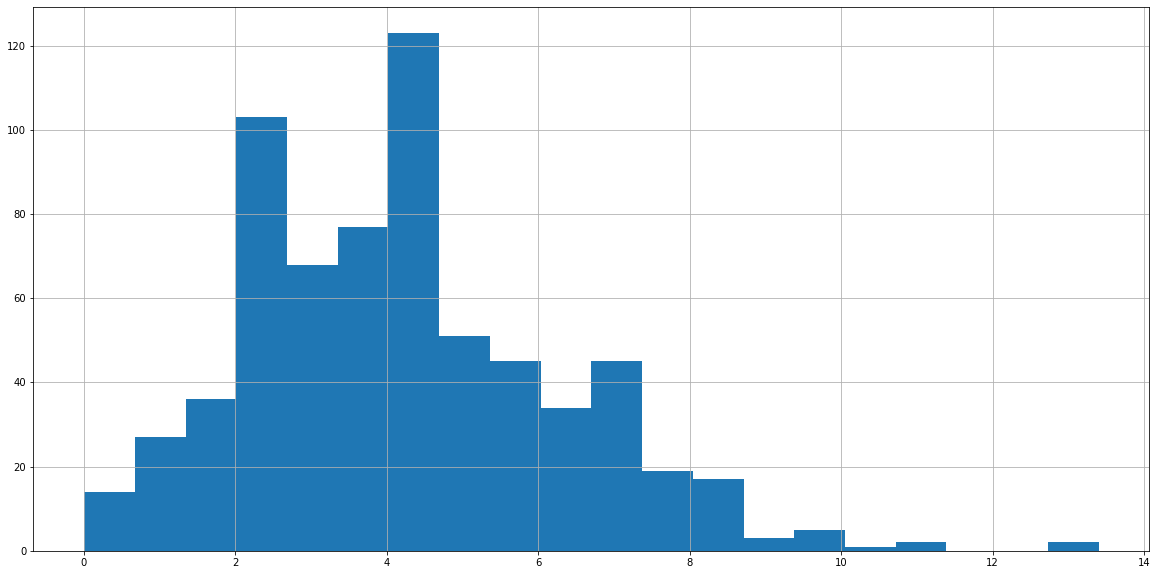

In [23]:
filter_df['WindSpd {m/s}'].hist(figsize=(20,10),bins=20)

### 実際にwind roseを作ってみる

In [25]:
! pip install windrose

  Using cached windrose-1.7.0-py3-none-any.whl (11 kB)


In [26]:
from windrose import WindroseAxes

In [27]:
def plotWindRose(df):
    ax = WindroseAxes.from_ax()
    ax.bar(df['WindDir {deg}'], df['WindSpd {m/s}'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()

年間を通してみると北からの風が優勢

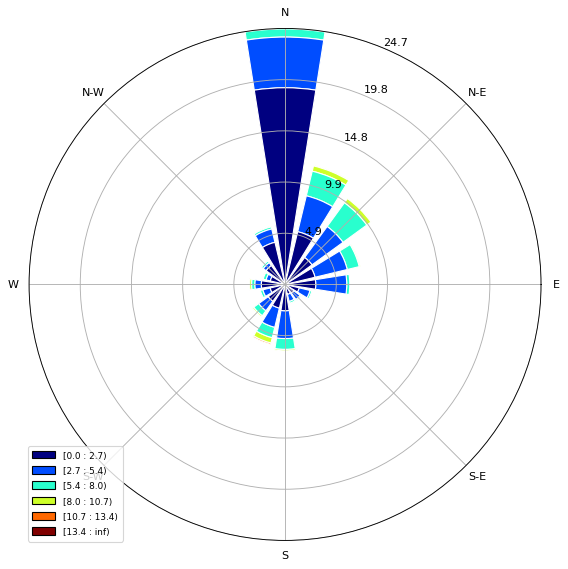

In [28]:
plotWindRose(df)

温度が15℃以上28℃以下、湿度が70%以下でフィルタリングした条件下では、全く違う風向条件

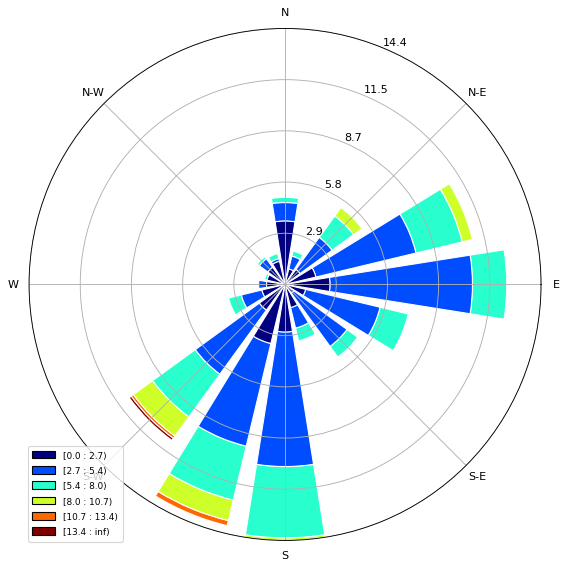

In [29]:
plotWindRose(filter_df)

### 月ごとのwind roseを表示してみたり

In [30]:
import matplotlib.pyplot as plt

In [31]:
def plotMonthlyWindRose(df):
    title_dict = {
        1:'January',
        2:'February',
        3:'March',
        4:'April',
        5:'May',
        6:'June',
        7:'July',
        8:'August',
        9:'September',
        10:'October',
        11:'November',
        12:'December',
    }
    fig = plt.figure(figsize=(20,10))
    for i in range(1,12):
        df_month=df[df.Month == i]
        ax = fig.add_subplot(3,4,i,projection='windrose')
        ax.set_title(title_dict[i])
        ax.bar(df_month['WindDir {deg}'], df_month['WindSpd {m/s}'],normed=True,opening=0.8,edgecolor='white')
    
    df_month12=df[df.Month == 12]
    ax12= fig.add_subplot(3,4,12,projection='windrose')
    ax12.set_title('December')
    ax12.bar(df_month12['WindDir {deg}'], df_month12['WindSpd {m/s}'],normed=True,opening=0.8,edgecolor='white')

    # ax1.legend()
    ax12.legend(bbox_to_anchor=(1.2 , -0.1))
    plt.tight_layout()
    plt.show()

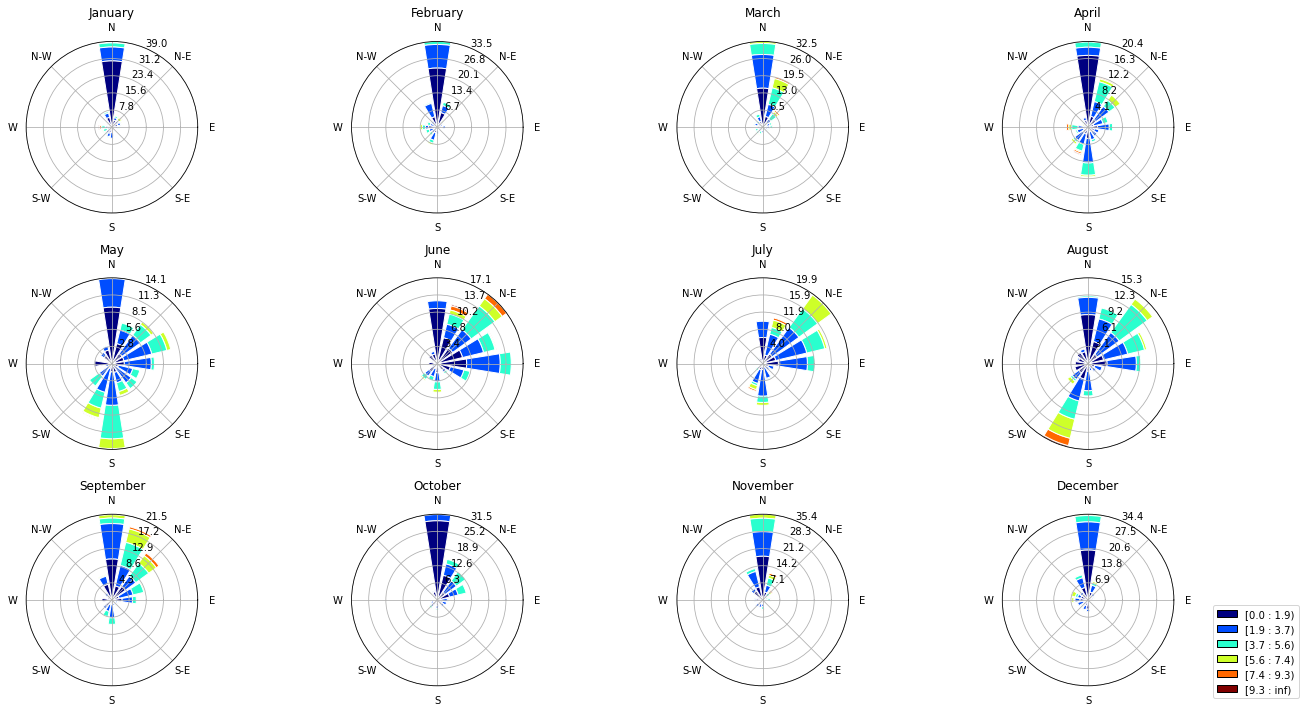

In [32]:
plotMonthlyWindRose(parse_df)

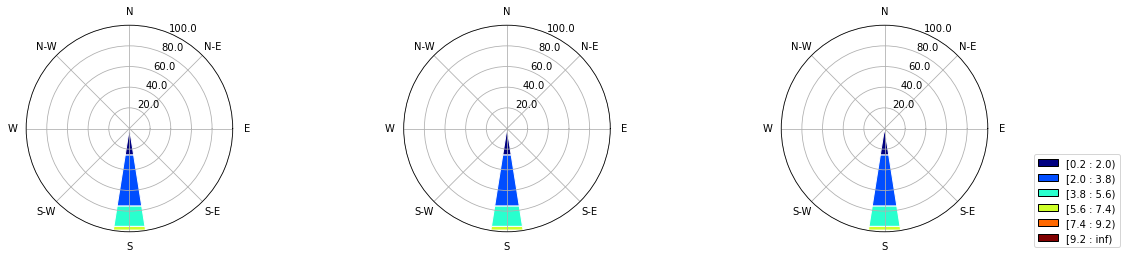

In [58]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(341,projection='windrose')
ax1.bar(df['WindDir {deg}'], df['WindSpd {m/s}'],normed=True,opening=0.8,edgecolor='white')
ax2 = fig.add_subplot(342,projection='windrose')
ax2.bar(df['WindDir {deg}'], df['WindSpd {m/s}'],normed=True,opening=0.8,edgecolor='white')
ax2 = fig.add_subplot(343,projection='windrose')
ax2.bar(df['WindDir {deg}'], df['WindSpd {m/s}'],normed=True,opening=0.8,edgecolor='white')

# ax1.legend()
ax2.legend(bbox_to_anchor=(1.2 , -0.1))
plt.tight_layout()
plt.show()

### ソースデータがどのように取得されているかちゃんとチェックする必要があります

### 特に風速！！！

In [34]:
df_Fukuoka=pd.read_csv('data/JPN_Fukuoka.epw.csv', names=col, header=None)
df_Fukuoka = parseDate(df_Fukuoka,True)

In [36]:
df_Fukuoka['WindDir {deg}']

2003-01-01 00:00:00    180
2003-01-01 01:00:00    180
2003-01-01 02:00:00    180
2003-01-01 03:00:00    180
2003-01-01 04:00:00    180
                      ... 
2003-12-31 19:00:00    180
2003-12-31 20:00:00    180
2003-12-31 21:00:00    180
2003-12-31 22:00:00    180
2003-12-31 23:00:00    180
Name: WindDir {deg}, Length: 8760, dtype: int64

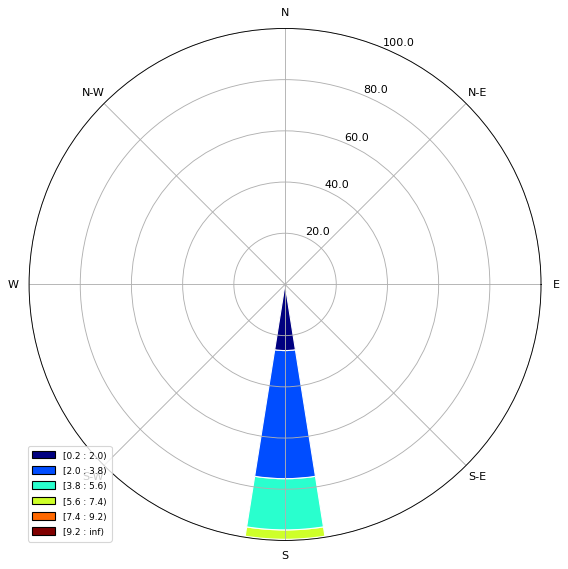

In [37]:
plotWindRose(df_Fukuoka)

全時間において、南から風が吹いている？？？ => そんなわけない。欠損データの補完方法がおかしいとか、いろいろな可能性があるので、元データを確認することは大事です

### 湿り空気線図に気象データをプロットしてみます

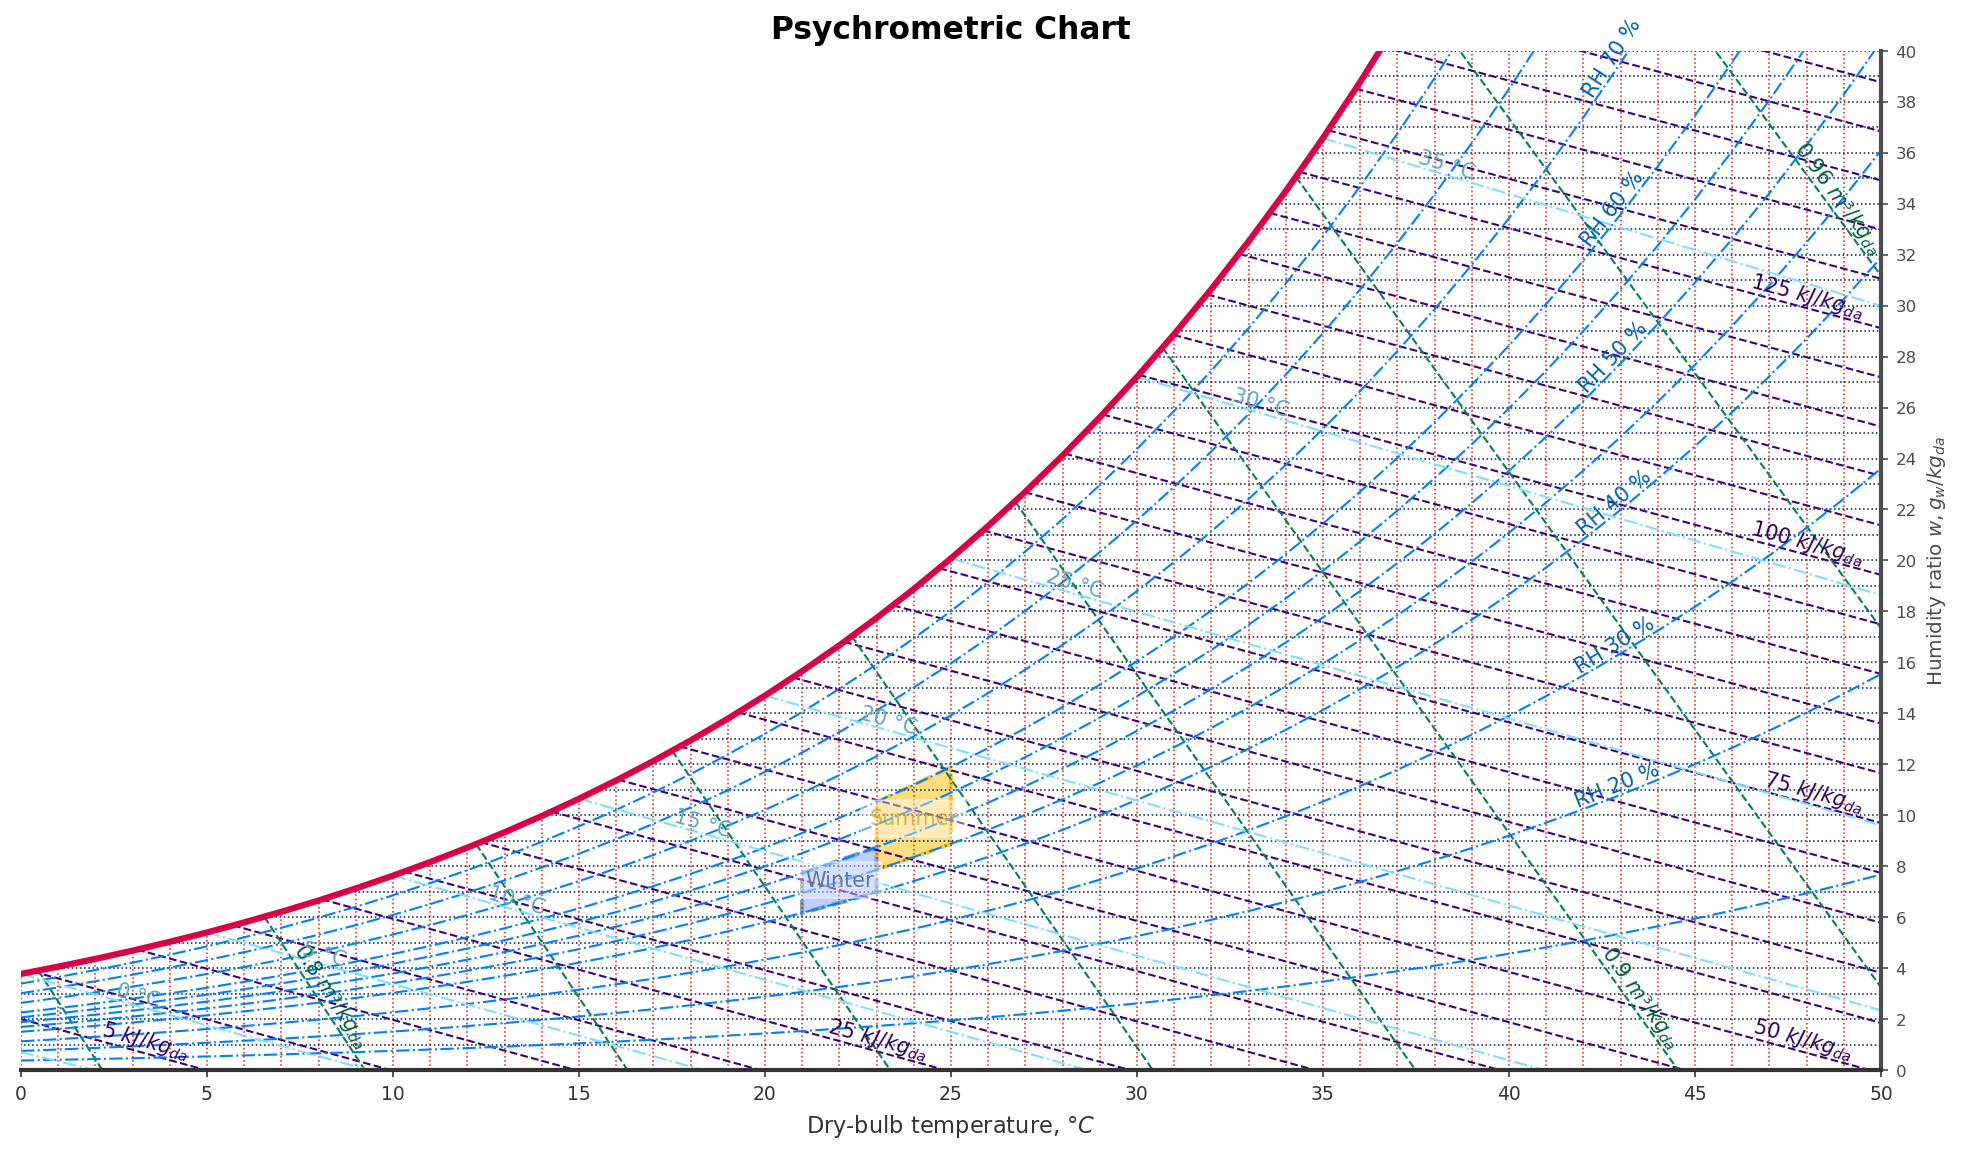

In [17]:
%matplotlib inline
from psychrochart import PsychroChart
import matplotlib.pyplot as plt

chart_default = PsychroChart()
axes = chart_default.plot()
axes.get_figure()

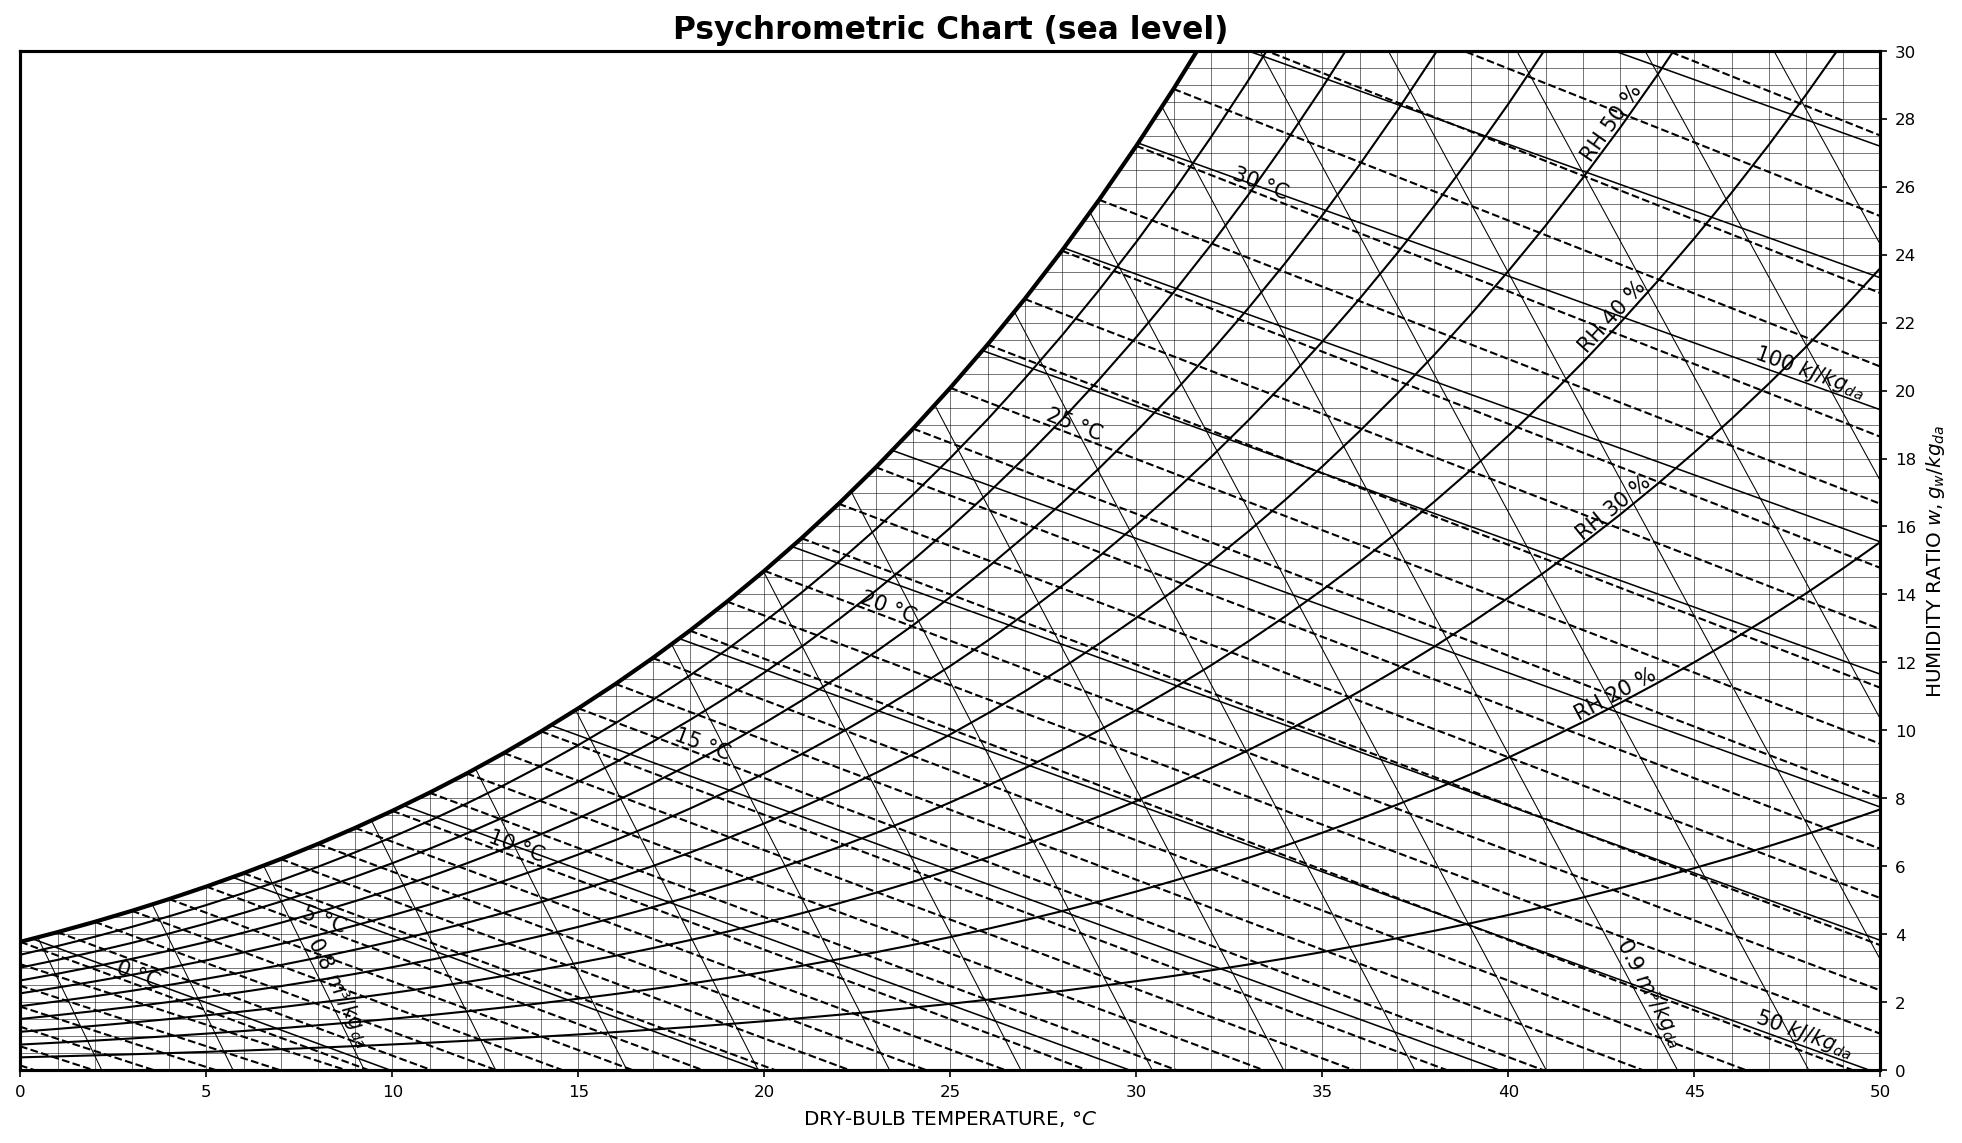

In [19]:
chart_ashrae_style = PsychroChart('ashrae')
ashrae=chart_ashrae_style.plot()
ashrae.get_figure()

In [46]:
import numpy as np

In [54]:
def plotPsychroChart(df):
    chart = PsychroChart("ashrae")

    # Append zones:
    zones_conf = {
        "zones":[{
                "zone_type": "dbt-rh",
                "style": {"edgecolor": [1.0, 0.749, 0.0, 0.8],
                          "facecolor": [1.0, 0.749, 0.0, 0.2],
                          "linewidth": 2,
                          "linestyle": "--"},
                "points_x": [23, 28],
                "points_y": [40, 60],
                "label": "Summer"
            },
            {
                "zone_type": "dbt-rh",
                "style": {"edgecolor": [0.498, 0.624, 0.8],
                          "facecolor": [0.498, 0.624, 1.0, 0.2],
                          "linewidth": 2,
                          "linestyle": "--"},
                "points_x": [18, 23],
                "points_y": [35, 55],
                "label": "Winter"
            }]}
    chart.append_zones(zones_conf)
    
    # Plot the chart
    ax = chart.plot()
    
    # create points based on dataframe data
    temp_array = df['DryBulb {C}'].to_numpy()
    humid_array = df['RelHum {%}'].to_numpy()
    #n = 1000 # データの個数
    #temp_array = np.random.rand(n)*40-5 # 乾球温度をランダムにn個作成
    #humid_array = np.random.rand(n)*100 # 相対湿度をランダムにn個作成
    points_array = {'epw data points': (temp_array, humid_array)}
    points_style = {'s': 9, 'alpha': 0.8, 'color': 'darkorange'}
    points = {'climate data': {'label': 'Exterior',
                       'style': {'color': [0.855, 0.004, 0.278, 0.8],
                                 'marker': 'X', 'markersize': 8},
                       'xy': (31.06, 32.9)}}
    
    chart.plot_points_dbt_rh(points_array, scatter_style=points_style)
    chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
    return ax

In [55]:
ax=plotPsychroChart(parse_df)

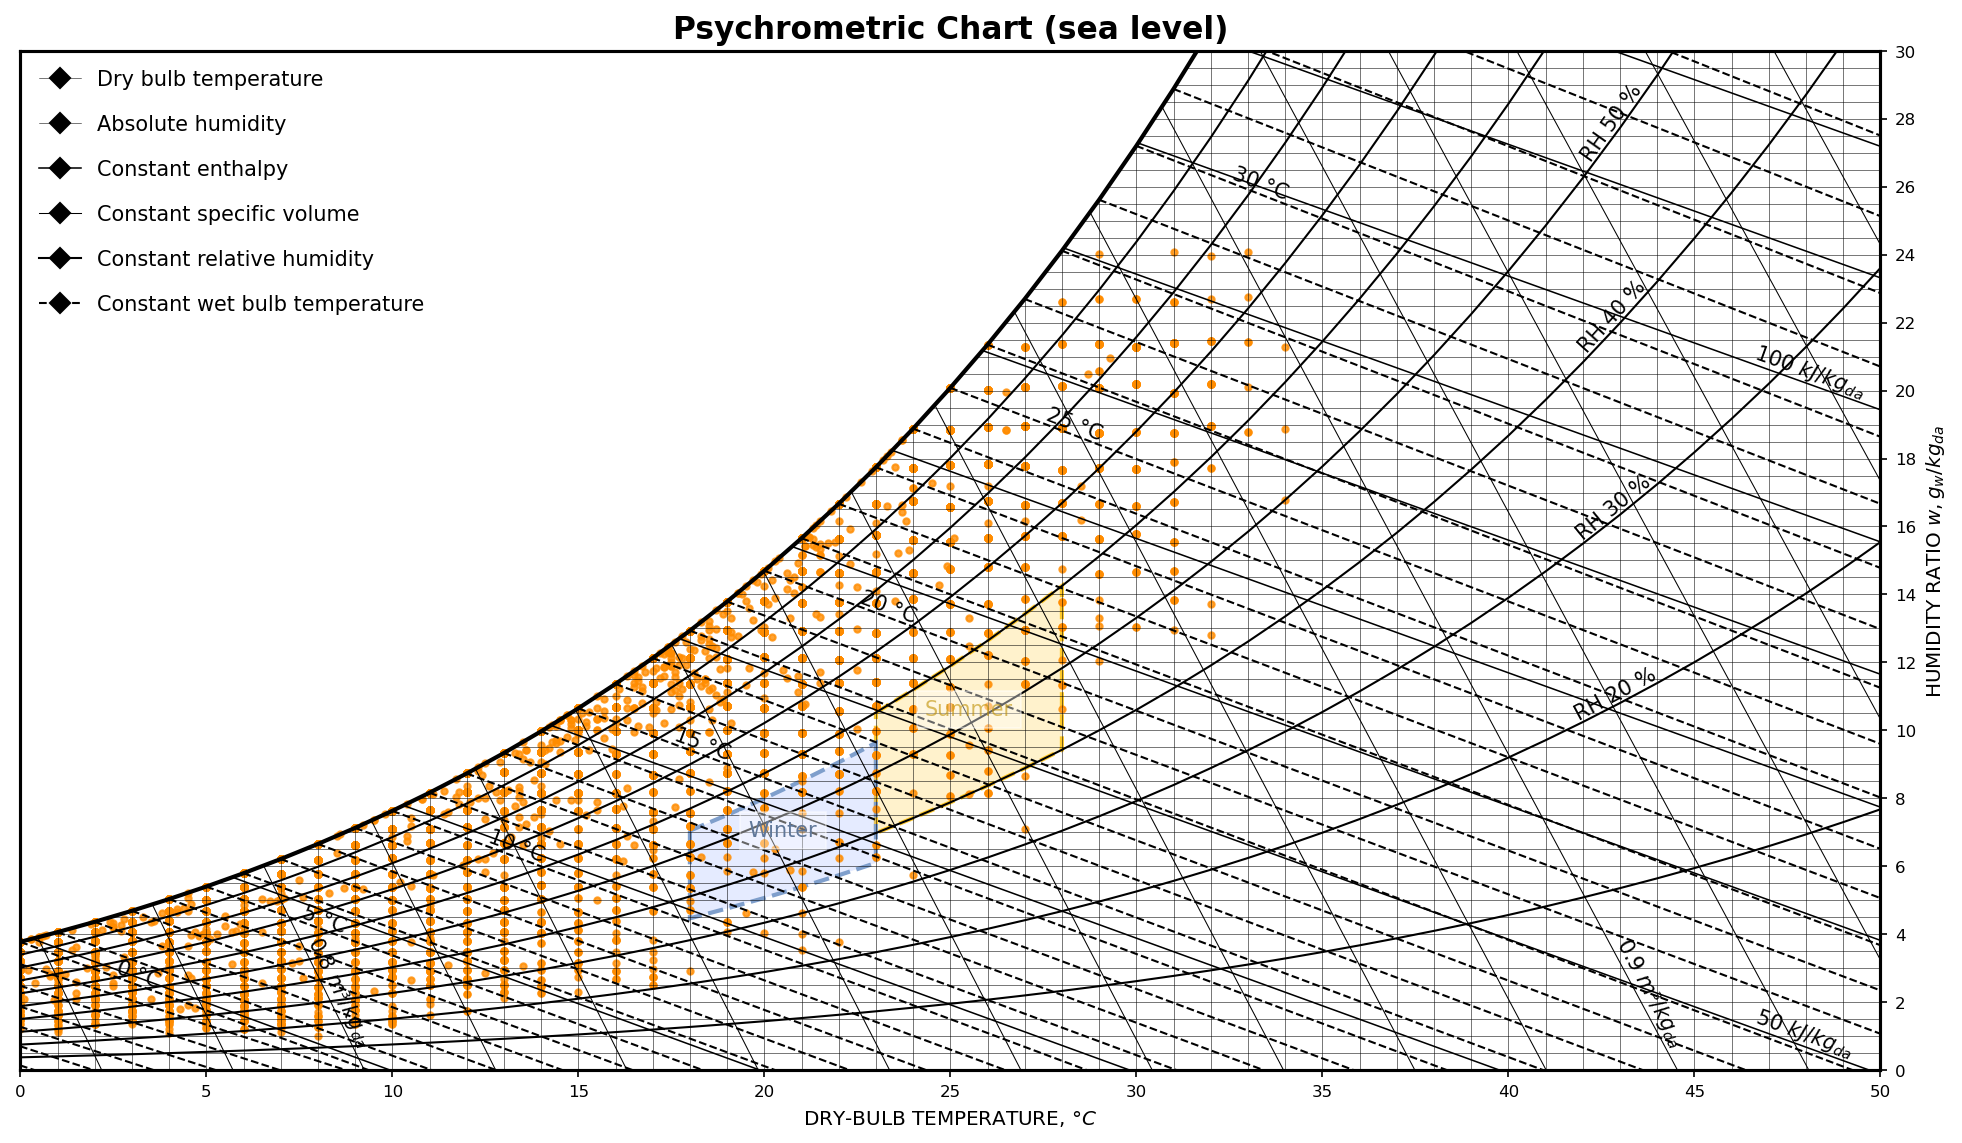

In [56]:
ax.get_figure()

In [ ]:
###